In [11]:
import pandas as pd
df = pd.read_csv('tips.csv')
%matplotlib inline

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
df.total_bill.max()

50.81

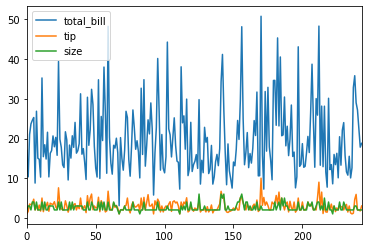

In [15]:
df.plot()

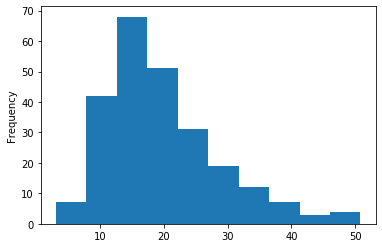

In [16]:
df.total_bill.plot(kind = 'hist')

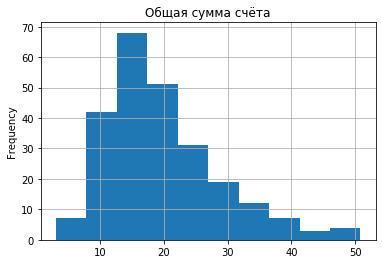

In [19]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

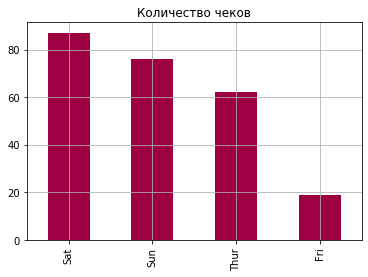

In [64]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'Spectral', 
                              title = 'Количество чеков')

In [23]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

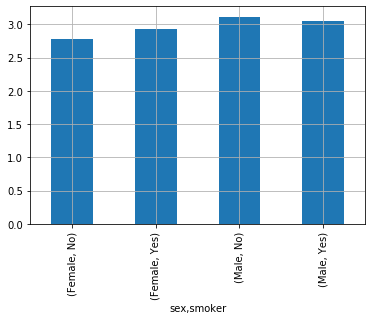

In [37]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11be58780>,
      dtype=object)

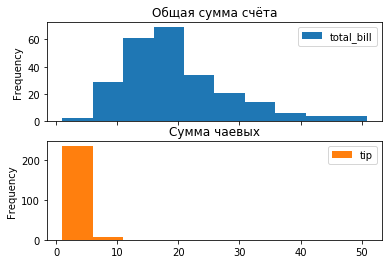

In [74]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
#                                grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = True)

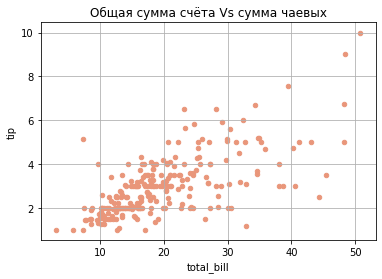

In [81]:
df.plot(x = 'total_bill', color = '#E9967A',
        y = 'tip', 
        kind = 'scatter',
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

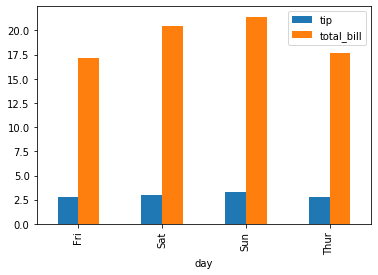

In [88]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

In [89]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean')

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


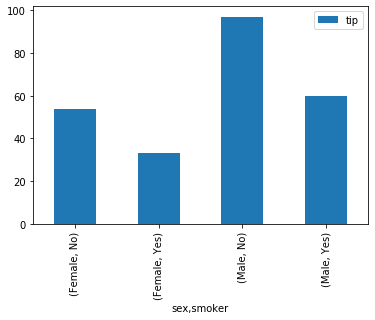

In [91]:
df.pivot_table(values = 'tip', 
               index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

In [92]:
df.pivot_table(values = 'tip', 
               index = ['sex', 'smoker'], aggfunc = 'count')

tip
sex    smoker     
Female No       54
       Yes      33
Male   No       97
       Yes      60

средняя сумма чаевых, которые оставляют курящие и некурящие посетители

In [103]:
df.pivot_table(values = 'tip',
              index = 'smoker',
              aggfunc = 'mean')

,tip
smoker,
No,2.991854
Yes,3.008710


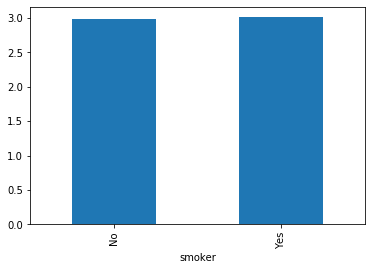

In [106]:
df.groupby('smoker')['tip'].mean().plot(kind = 'bar')

In [104]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [108]:
import matplotlib.pyplot as plt

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

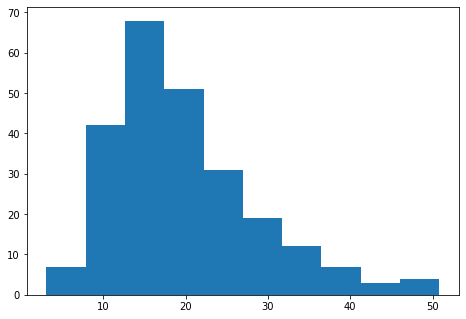

In [112]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

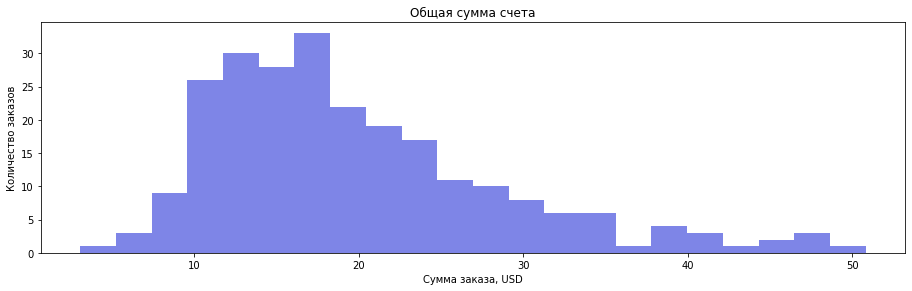

In [122]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 0.8])
axes.hist(df['total_bill'], bins = 22, color = '#7E85E7')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

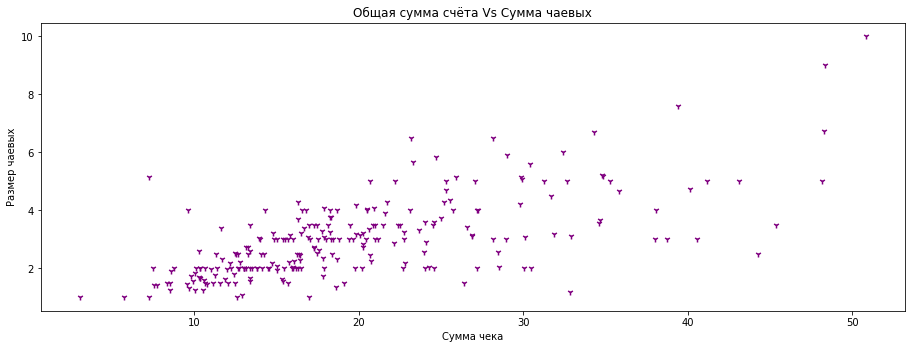

In [137]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = '1', color = 'purple')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

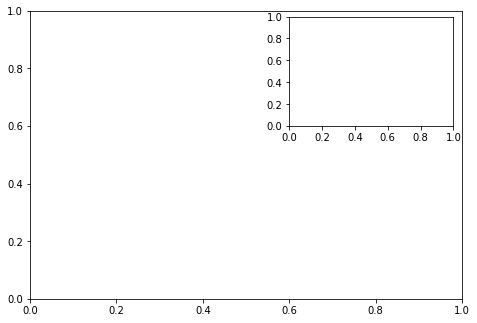

In [138]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

In [145]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

In [146]:
tips_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


Text(0, 0.5, 'Сумма')

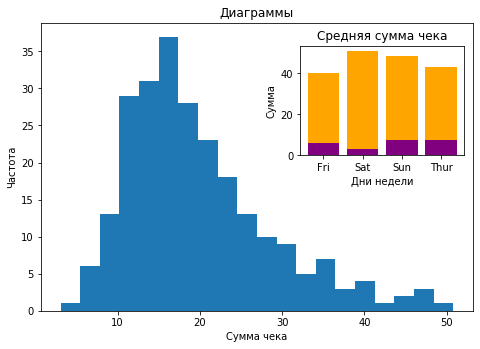

In [163]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'], bins = 20)
insert_axes = fig.add_axes([0.6, 0.54, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], color = 'orange')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], color = 'purple')

main_axes.set_title('Диаграммы')
main_axes.set_xlabel('Сумма чека')
main_axes.set_ylabel('Частота')
insert_axes.set_title('Средняя сумма чека')
insert_axes.set_xlabel('Дни недели')
insert_axes.set_ylabel('Сумма')

<BarContainer object of 4 artists>

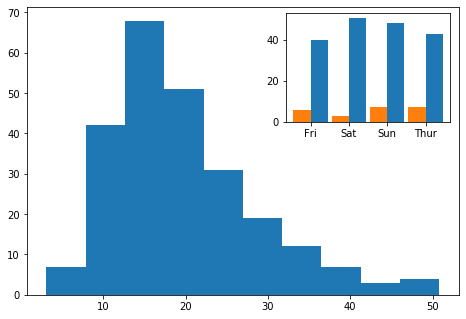

In [170]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.45, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.45, align = 'edge')

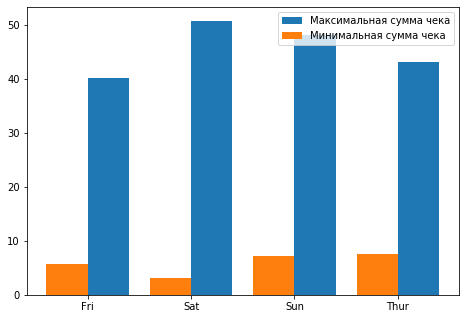

In [188]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
         width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
         width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

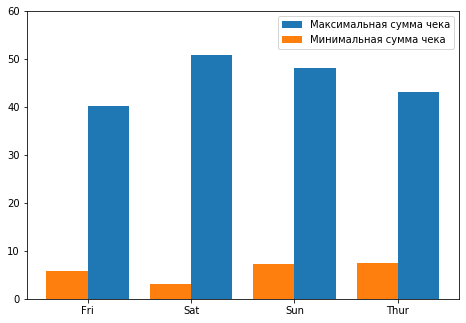

In [189]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], width = 0.4, align = 'edge', label = "Максимальная сумма чека")
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], width = -0.4, align = 'edge', label = "Минимальная сумма чека")
axes.legend(loc = 1)


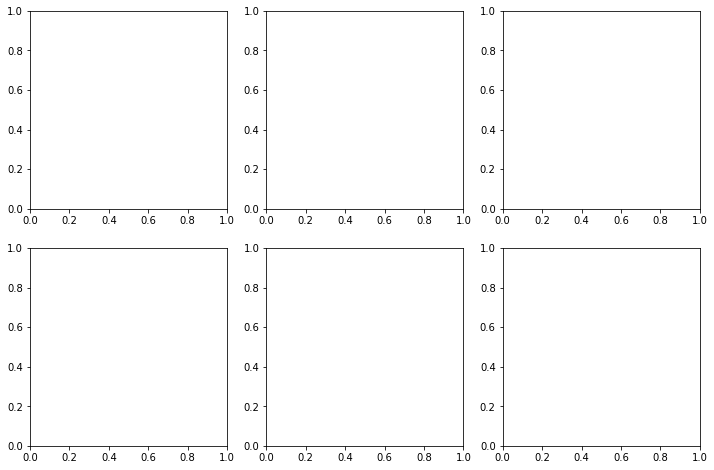

In [198]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))

Text(0.5, 1.0, 'Общая сумма счёта Vs Cумма чаевых')

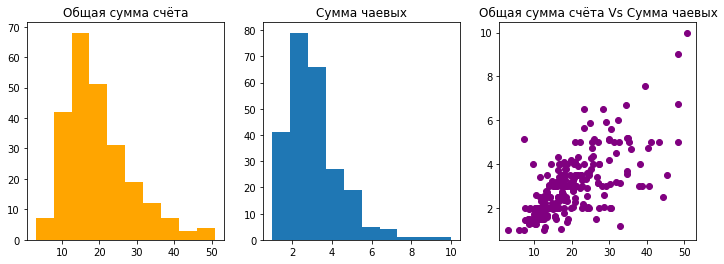

In [204]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'], color = 'orange')
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o', color = 'purple')
axes[2].set_title('Общая сумма счёта Vs Cумма чаевых')


In [205]:
import numpy as np

In [206]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

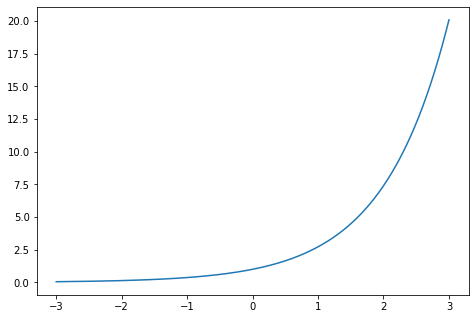

In [211]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

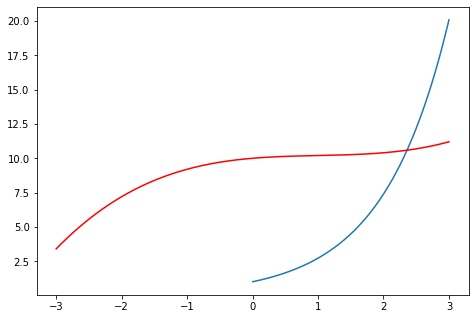

In [220]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2, color = 'red')

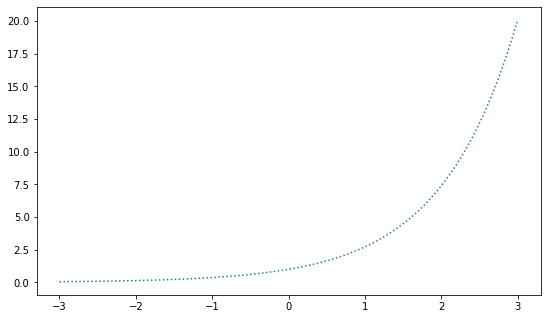

In [223]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle=':')

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

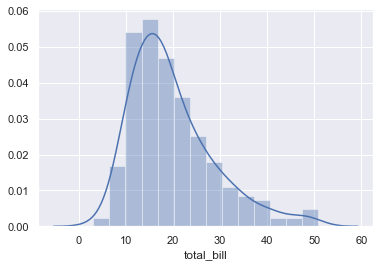

In [228]:
sns.set()
sns.distplot(df['total_bill'])

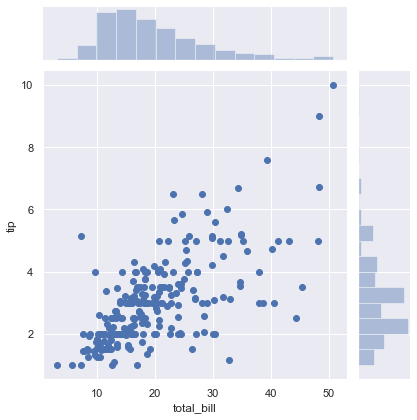

In [229]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

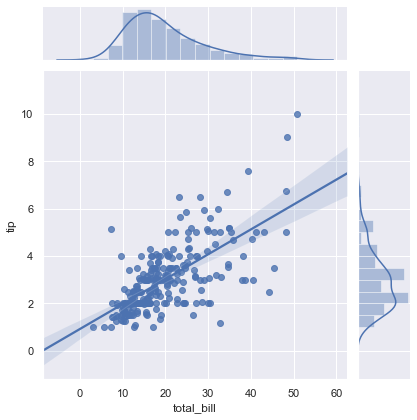

In [230]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

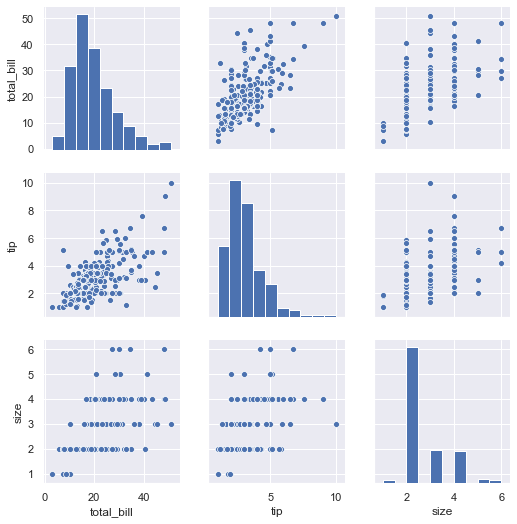

In [231]:
sns.pairplot(df)

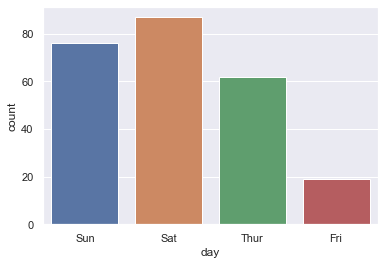

In [232]:
sns.countplot(x = 'day', data = df)

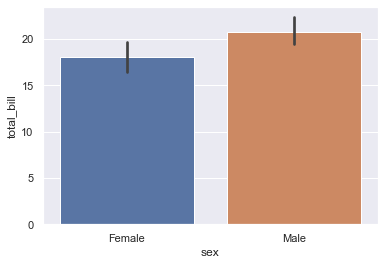

In [237]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

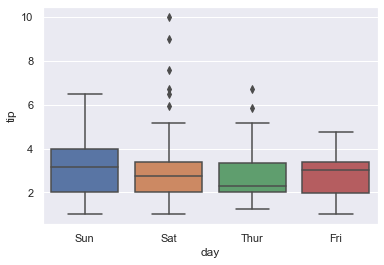

In [238]:
sns.boxplot(x = 'day', y = 'tip', data = df)

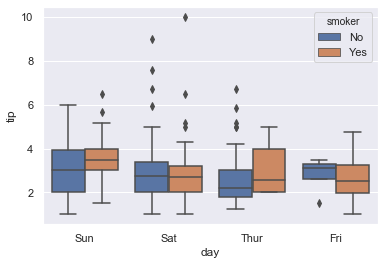

In [241]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

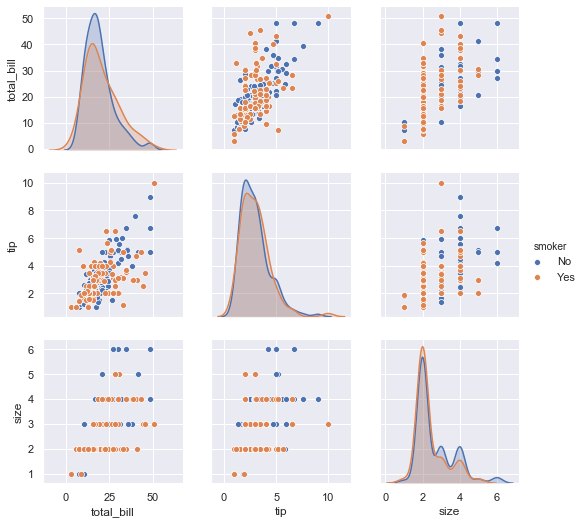

In [242]:
sns.pairplot(df, hue = 'smoker')

In [243]:
correlation = df.corr()

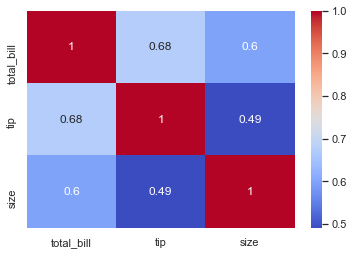

In [244]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [245]:
!pip install plotly

     |████████████████████████████████| 7.3MB 2.8MB/s eta 0:00:01
  Stored in directory: /Users/lakamb/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [246]:
!pip install cufflinks

     |████████████████████████████████| 81kB 715kB/s eta 0:00:01
     |████████████████████████████████| 81kB 1.2MB/s eta 0:00:01


  Stored in directory: /Users/lakamb/Library/Caches/pip/wheels/44/d7/dc/e830ab00bc2dd3b2731295103baa070f8cbdda8891f71a7a8d
Successfully built cufflinks


In [247]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [248]:
init_notebook_mode(connected = True)
cf.go_offline()

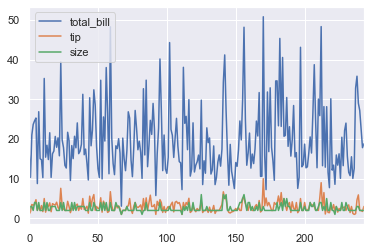

In [249]:
df.plot()

In [250]:
df.iplot()

In [251]:
df[['total_bill','tip']].iplot(kind = 'spread')

In [252]:
df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size ='tip')

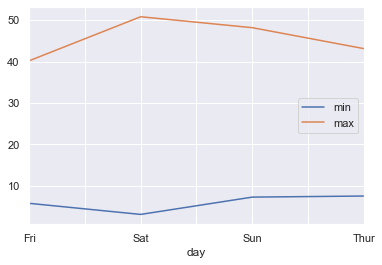

In [254]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()